In [3]:
import tensorflow as tf
import keras
import pickle
import gzip
import numpy as np
import pandas as pd
import statistics
import math
from sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import os,random
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras.models as models
from tensorflow.keras.layers import Reshape, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, SeparableConv2D
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras import regularizers
from keras.layers import add
from mlxtend.plotting import plot_confusion_matrix



In [4]:
# Load the data
with open('2016.04C.multisnr.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

# Extract sorted SNRs and mods
snrs, mods = map(lambda j: sorted(list(set(map(lambda x: x[j], p.keys())))), [1, 0])

X = []
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(p[mod, snr])
        for i in range(p[(mod, snr)].shape[0]):
            lbl.append((mod, snr))

# Convert lists to NumPy arrays
X = np.vstack(X)

# Prepare lists for storing labels, mod, and data
label = []
mod = []
data = []

for i in range(len(lbl)):
    label.append(lbl[i][0])
    mod.append(lbl[i][1])
    data.append(X[i])

# Create a list of tuples (or list of lists) instead of a NumPy array
arr_2 = [(label[i], mod[i], data[i]) for i in range(len(label))]

# If you need to work with NumPy arrays separately:
label_arr = np.array(label)
mod_arr = np.array(mod)
data_arr = np.array(data, dtype=object)  

In [5]:
dataset = pd.DataFrame(arr_2, columns =['Modulation Type','SNR','Values'])

dataset = dataset.set_index('Modulation Type')

In [6]:
dataset.head()

,SNR,Values
Modulation Type,,
8PSK,-20,"[[24.714563, -29.568644, 92.68012, -0.6211241,..."
8PSK,-20,"[[-7.4243298, 119.80825, -111.365616, -27.8646..."
8PSK,-20,"[[140.26158, -55.305504, 91.71414, 35.363003, ..."
8PSK,-20,"[[59.466553, -58.749474, -63.58964, 109.952866..."
8PSK,-20,"[[-18.136866, -86.98702, 2.8082519, -72.49883,..."


In [7]:
dataset = dataset.drop('WBFM',axis= 0)
dataset = dataset.drop('QPSK',axis= 0)
dataset = dataset.drop('AM-DSB',axis= 0)
dataset = dataset.drop('AM-SSB',axis= 0)
dataset = dataset.drop('CPFSK',axis= 0)


In [8]:
dataset = dataset.reset_index()

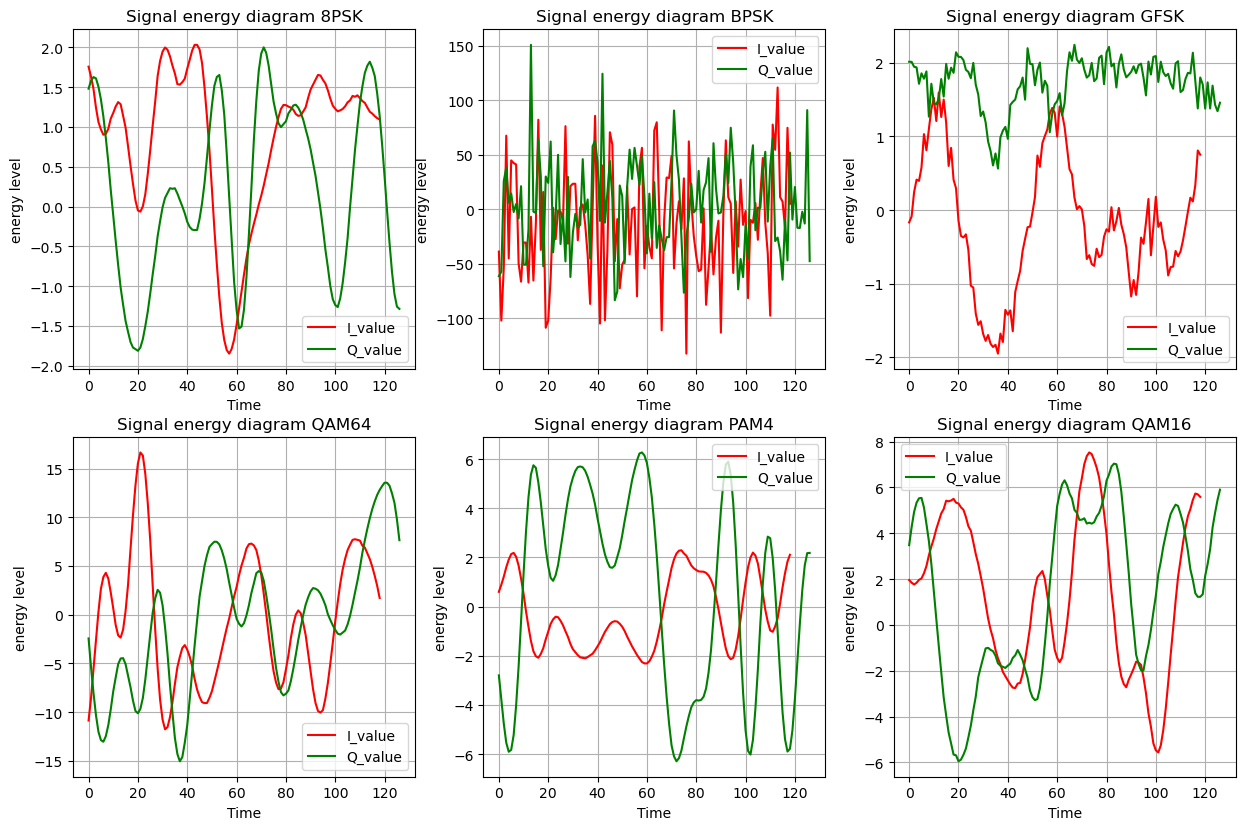

In [9]:
m1 = 8000
X1 = dataset.iat[m1,2]
X2 = dataset.iat[m1,0]
X1 = X1.flatten()

m2 = 10000
X3 = dataset.iat[m2,2]
X4 = dataset.iat[m2,0]
X3 = X3.flatten()

m3 = 50000
X5 = dataset.iat[m3,2]
X6 = dataset.iat[m3,0]
X5 = X5.flatten()

m4 = 80000
X7 = dataset.iat[m4,2]
X8 = dataset.iat[m4,0]
X7 = X7.flatten()

m5 = 69500
X9 = dataset.iat[m5,2]
X10 = dataset.iat[m5,0]
X9 = X9.flatten()

m6 = 75500
X11 = dataset.iat[m6,2]
X12 = dataset.iat[m6,0]
X11 = X11.flatten()

plt.figure(figsize = (15,15))

plt.subplot(331)

plt.plot(X1[1:120], color = 'red', label ='I_value')
plt.plot(X1[129:256], color = 'green', label ='Q_value')
plt.title(f"Signal energy diagram {X2}")
plt.xlabel('Time')
plt.grid()
plt.ylabel('energy level')
plt.legend()

plt.subplot(332)

plt.plot(X3[1:120], color = 'red', label ='I_value')
plt.plot(X3[129:256], color = 'green', label ='Q_value')
plt.title(f"Signal energy diagram {X4}")
plt.xlabel('Time')
plt.grid()
plt.ylabel('energy level')
plt.legend()

plt.subplot(333)

plt.plot(X5[1:120], color = 'red', label ='I_value')
plt.plot(X5[129:256], color = 'green', label ='Q_value')
plt.title(f"Signal energy diagram {X6}")
plt.xlabel('Time')
plt.grid()
plt.ylabel('energy level')
plt.legend()

plt.subplot(334)

plt.plot(X7[1:120], color = 'red', label ='I_value')
plt.plot(X7[129:256], color = 'green', label ='Q_value')
plt.title(f"Signal energy diagram {X8}")
plt.xlabel('Time')
plt.grid()
plt.ylabel('energy level')
plt.legend()

plt.subplot(335)

plt.plot(X9[1:120], color = 'red', label ='I_value')
plt.plot(X9[129:256], color = 'green', label ='Q_value')
plt.title(f"Signal energy diagram {X10}")
plt.xlabel('Time')
plt.grid()
plt.ylabel('energy level')
plt.legend()

plt.subplot(336)

plt.plot(X11[1:120], color = 'red', label ='I_value')
plt.plot(X11[129:256], color = 'green', label ='Q_value')
plt.title(f"Signal energy diagram {X12}")
plt.xlabel('Time')
plt.grid()
plt.ylabel('energy level')
plt.legend()

In [10]:
def gaussian_noise(mu,sigma):
    noise = np.random.normal(mu,sigma,[2,128])
    return noise

def noise_added(signal, Gnoise):
    signal = signal + Gnoise
    return signal

def sd_calc(data):
    meanValue = statistics.mean(data)
    var = statistics.variance(data,meanValue)
    sd = math.sqrt(var)
    return sd

In [11]:
array_noisesignal = []
noise_signal = []
for i in range(len(dataset)):
    temp = dataset.iat[i,2]
    std = sd_calc(temp[0])
    n1 = gaussian_noise(0, std)
    noise_signal.append(n1)
    final = noise_added(temp,n1)
    array_noisesignal.append(final)

array_noisesignal = np.array(array_noisesignal)
noise_signal = np.array(noise_signal)
dataset_2 = dataset.copy()

dataset['data'] = array_noisesignal.tolist()
dataset_2['noise'] = noise_signal.tolist()

dataset = dataset.drop(columns = ['Values'])
dataset_2 = dataset_2.drop(columns = ['Values'])

labels_noise = np.zeros([80900,1])
labels_signal = np.ones([80900,1])

dataset['labels'] = labels_noise.tolist()
dataset_2['labels'] = labels_signal.tolist()

dataset['labels'] = labels_noise.astype('int64')
dataset_2['labels'] = labels_signal.astype('int64')

dataset_2.columns = dataset.columns
df = pd.concat([dataset, dataset_2], ignore_index=True)

In [12]:
print(dataset.columns)

Index(['Modulation Type', 'SNR', 'data', 'labels'], dtype='object')


In [13]:
df = df.sample(frac=1).reset_index(drop=True)

In [14]:
df

,Modulation Type,SNR,data,labels
0,GFSK,-8,"[[-4.2940692757503, -6.004402958438942, 1.4276...",0
1,QAM16,-20,"[[-198.2088062972328, -107.91615524927053, 119...",0
2,GFSK,-14,"[[6.050007010303671, 25.56073026274552, -24.12...",1
3,BPSK,12,"[[-0.6108592148466845, 0.6889218475978589, -0....",0
4,QAM64,-20,"[[-38.36767470318871, 61.88052998691694, 10.80...",1
...,...,...,...,...
161795,BPSK,-4,"[[0.4379030008698312, 1.8221419265818006, -0.4...",1
161796,QAM16,-4,"[[2.7744075914022712, 8.48148562176733, 4.0320...",0
161797,GFSK,-20,"[[-68.70836406869601, 110.77032777268805, 40.4...",1
161798,GFSK,2,"[[-1.7714707955666575, -1.1450350231290127, -3...",0


In [15]:
y = list(df['labels'])
X = df['data']

np.random.seed(258)
n_examples = X.shape[0]
n_train = n_examples * 0.70
train_idx = np.random.choice(range(0,n_examples), size = int(n_train), replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test = X[test_idx]

In [16]:
print(X_test.shape)

(48540,)


In [17]:
X_train = np.array(X_train)

for i in range(len(X_train)):
    X_train[i] = np.array(X_train[i])

X_train_final =[]
for i in X_train:
    X_train_final.append(i)

X_train_final = np.array(X_train_final)
X_train_final.shape

(113260, 2, 128)

In [18]:
X_test = np.array(X_test)

for i in range(len(X_test)):
    X_test[i]= np.array(X_test[i])
    
X_test_final = []
for i in X_test:
    X_test_final.append(i)

X_test_final = np.array(X_test_final)
X_test_final.shape

(48540, 2, 128)

In [19]:
y_train_final = []
y_test_final = []
for i in train_idx:
    y_train_final.append(y[i])
for j in test_idx:
    y_test_final.append(y[j])

y_train_final = np.array(y_train_final)
y_test_final = np.array(y_test_final)

In [20]:
in_shp =[2,128]

In [21]:
import keras.models as models
drop_rate_1 = 0.3

cnn = keras.models.Sequential()
cnn.add(Reshape(in_shp+[1], input_shape=in_shp))

cnn.add(Conv2D(128,(1,8),padding='valid', activation="relu", name="conv1",kernel_initializer='glorot_uniform',data_format ="channels_last"))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=None, padding="valid" , data_format=None))

cnn.add(Conv2D(96,(1,4),padding='valid', activation="relu", name="conv2",kernel_initializer='glorot_uniform',data_format ="channels_last"))

cnn.add(Conv2D(64,(1,8),padding='valid', activation="relu", name="conv3",kernel_initializer='glorot_uniform',data_format ="channels_last"))
cnn.add(MaxPooling2D(pool_size=(1,1), strides=None, padding="valid" , data_format=None))

cnn.add(Conv2D(32,(1,8),padding='valid', activation="relu", name="conv4",kernel_initializer='glorot_uniform',data_format ="channels_last"))

cnn.add(Flatten())
cnn.add(Dense(125, activation='relu', kernel_initializer = 'he_normal'))
cnn.add(Dense(50, activation='relu', kernel_initializer = 'he_normal'))
cnn.add(Dropout(drop_rate_1))
cnn.add(Dense(5, activation='relu', kernel_initializer = 'he_normal'))
cnn.add(Dense(1, kernel_initializer = 'he_normal'))

cnn.add(Activation('sigmoid'))

cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn.summary())

C:\Users\THINKPAD\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 2, 128, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 2, 121, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 1, 60, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 1, 57, 96)           │          49,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv2D)                       │ (None, 1, 50, 64)           │          49,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 50, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv4 (Conv2D)                       │ (None, 1, 43, 32)           │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1376)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 125)                 │         172,125 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             255 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 294,718 (1.12 MB)

 Trainable params: 294,718 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
nb_epoch = 50
batch_size = 500

In [23]:
filepath = 'model_d4.wts.h5'

In [38]:
HIS = cnn.fit(
    X_train_final,
    y_train_final,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
    validation_split=0.15,
    callbacks=[
        keras.callbacks.ModelCheckpoint('model_d2.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, verbose=1, mode='auto')
    ]
)


Epoch 1/50

Epoch 1: val_loss improved from inf to 0.26296, saving model to model_d2.keras
193/193 - 47s - 242ms/step - accuracy: 0.8606 - loss: 0.2493 - val_accuracy: 0.8546 - val_loss: 0.2630
Epoch 2/50

Epoch 2: val_loss improved from 0.26296 to 0.25232, saving model to model_d2.keras
193/193 - 50s - 262ms/step - accuracy: 0.8617 - loss: 0.2495 - val_accuracy: 0.8617 - val_loss: 0.2523
Epoch 3/50

Epoch 3: val_loss improved from 0.25232 to 0.24985, saving model to model_d2.keras
193/193 - 50s - 257ms/step - accuracy: 0.8612 - loss: 0.2483 - val_accuracy: 0.8621 - val_loss: 0.2499
Epoch 4/50

Epoch 4: val_loss did not improve from 0.24985
193/193 - 49s - 255ms/step - accuracy: 0.8606 - loss: 0.2480 - val_accuracy: 0.8627 - val_loss: 0.2543
Epoch 5/50

Epoch 5: val_loss improved from 0.24985 to 0.24908, saving model to model_d2.keras
193/193 - 51s - 262ms/step - accuracy: 0.8610 - loss: 0.2482 - val_accuracy: 0.8628 - val_loss: 0.2491
Epoch 6/50

Epoch 6: val_loss did not improve from

In [39]:
cnn.load_weights('model_d2.keras')

In [40]:
scscore = cnn.evaluate(X_test_final, y_test_final, batch_size=batch_size)
print(cnn.metrics_names)
print(scscore)

98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8609 - loss: 0.2462
['loss', 'compile_metrics']
[0.24365614354610443, 0.8618870973587036]


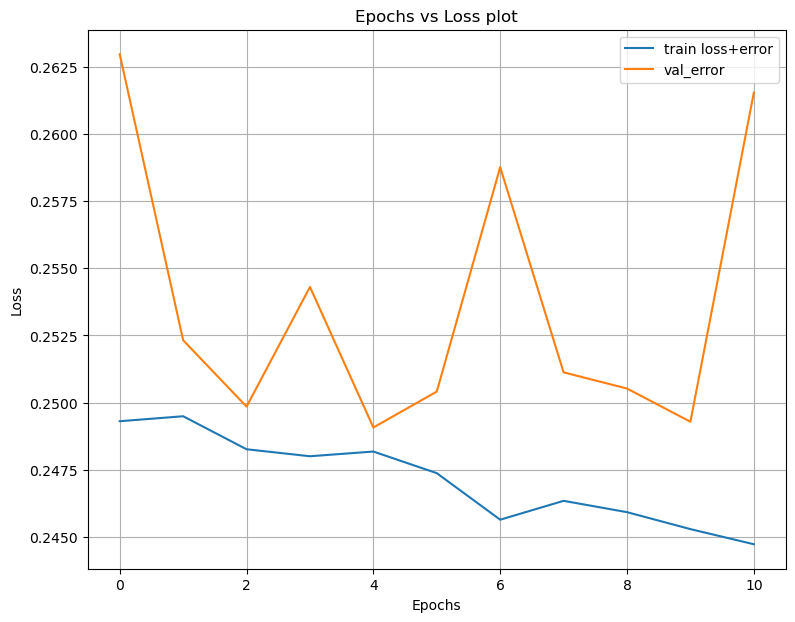

In [41]:
plt.figure(figsize=(9,7))
plt.title('Training performance')
plt.plot(HIS.epoch, HIS.history['loss'],label='train loss+error')
plt.plot(HIS.epoch, HIS.history['val_loss'],label='val_error')
plt.title("Epochs vs Loss plot")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

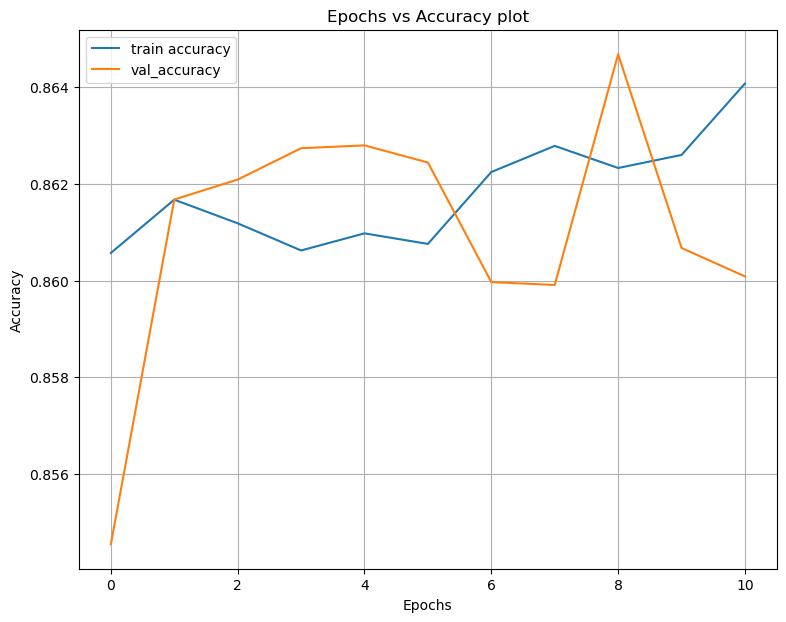

In [42]:
plt.figure(figsize=(9,7))
plt.title('Training performance')
plt.plot(HIS.epoch, HIS.history['accuracy'],label='train accuracy')
plt.plot(HIS.epoch, HIS.history['val_accuracy'],label='val_accuracy')
plt.title("Epochs vs Accuracy plot")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

In [43]:
classes=['noise','signal']
test_Y_hat = cnn.predict(X_test_final, batch_size=batch_size)

prediction=[]
for i in range(len(test_Y_hat)):
    prediction.append(list(test_Y_hat[i]))

final_prediction = []
for j in range(len(prediction)):
    final_prediction.append(round(prediction[j][0]))

98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step


<Figure size 900x900 with 0 Axes>

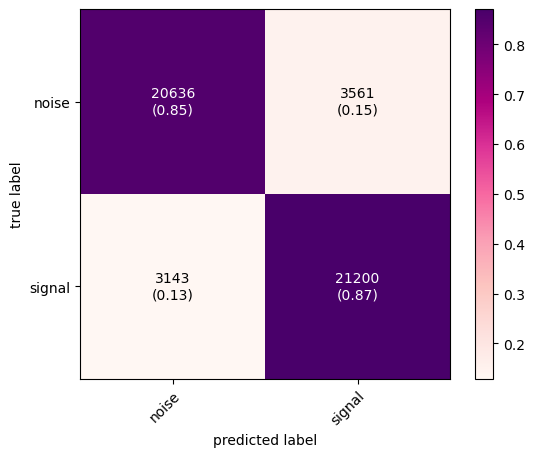

In [44]:
from mlxtend.plotting import plot_confusion_matrix
plt.figure(figsize =(9,9))
cm = confusion_matrix(y_test_final, final_prediction)
class_names = ['noise','signal']
fig, ax = plot_confusion_matrix(conf_mat=cm, cmap='RdPu', class_names=class_names,colorbar =True, show_normed=True)
plt.show()

In [45]:
data_snr = df.loc[test_idx, :]
data_snr['prediction'] = final_prediction

data_snr = data_snr.reset_index()
data_snr

,index,Modulation Type,SNR,data,labels,prediction
0,1,QAM16,-20,"[[-198.2088062972328, -107.91615524927053, 119...",0,0
1,3,BPSK,12,"[[-0.6108592148466845, 0.6889218475978589, -0....",0,0
2,131079,GFSK,-18,"[[-68.01664308883649, -66.17099523997204, -21....",1,0
3,131080,GFSK,-20,"[[-128.3937836966367, 130.99761556011057, 76.2...",0,0
4,10,QAM64,18,"[[2.164257806600188, 17.619541997742008, 3.772...",1,1
...,...,...,...,...,...,...
48535,131055,BPSK,0,"[[0.8083421122634776, -0.7584245878388151, -0....",1,1
48536,131057,BPSK,-20,"[[41.71041042150003, -73.09575039019587, -7.81...",1,0
48537,131061,GFSK,-12,"[[-3.7318590112008194, 3.138387840997149, 13.5...",0,1
48538,131064,GFSK,0,"[[0.17904305694051115, 2.1831332651999946, 1.8...",1,1


In [46]:
snr = [-20, -16, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16]
final_acc=[]
for i in range(len(snr)):
    correct = 0
    wrong = 0
    for k in range(len(data_snr)):
      if(data_snr['SNR'][k]== snr[i]):
        if(data_snr['labels'][k]== data_snr['prediction'][k]):
            correct +=1
        else:
            wrong +=1
    acc= correct/(correct+wrong)
    final_acc.append(acc)

In [47]:
final_acc

[0.4854614412136536,
 0.7677886663826161,
 0.6454102355808286,
 0.6590069757899056,
 0.7352226720647773,
 0.8897370653095844,
 0.9670886075949368,
 0.9888106092001657,
 0.9904365904365905,
 0.9916562369628703,
 0.9951980792316927,
 0.9902160619649409,
 0.9954070981210856,
 0.9944642151047846,
 0.9946546052631579,
 0.9942268041237113,
 0.9937133277451802]

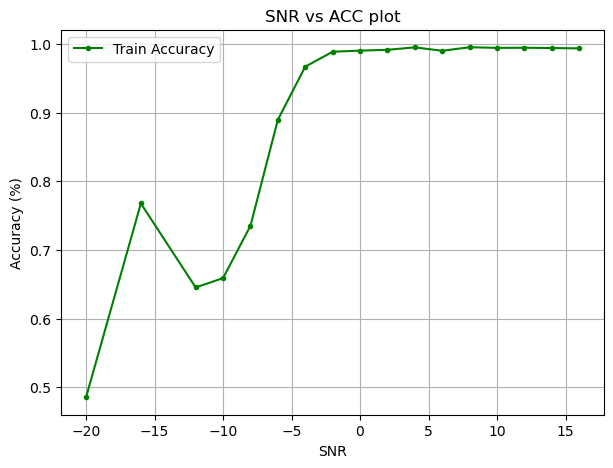

In [48]:
plt.figure(figsize=(7,5))
plt.plot(snr,final_acc,'g',label ="Train Accuracy", marker =".")
plt.title("SNR vs ACC plot")
plt.xlabel("SNR")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid()

In [50]:
snr = [-20, -16, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16]
final_acc_cm=[]
for i in range(len(snr)):
    correct_0 = 0
    wrong_0 = 0
    correct_1 = 0
    wrong_1 = 0
    for k in range(len(data_snr)):
        if(data_snr['SNR'][k]== snr[i]):
            if(data_snr['labels'][k]== data_snr['prediction'][k]):
                if(data_snr['labels'][k]==0):
                  correct_0 +=1
                else:
                    wrong_0 +=1
            else:
                if(data_snr['labels'][k]==0):
                    wrong_0 +=1
                else:
                  wrong_1 +=1

    TP = correct_1/(correct_1 + wrong_0)
    TN = correct_0/(correct_0 + wrong_1)
    FP = wrong_1/(wrong_1 + correct_0)
    FN = wrong_0/(wrong_0 + correct_1)
    acc= correct/(correct + wrong)
    final_acc_cm.append([[TN,FN],[FP,TP]])

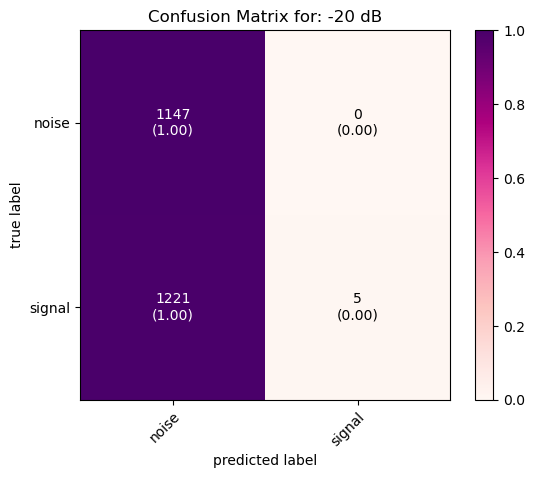

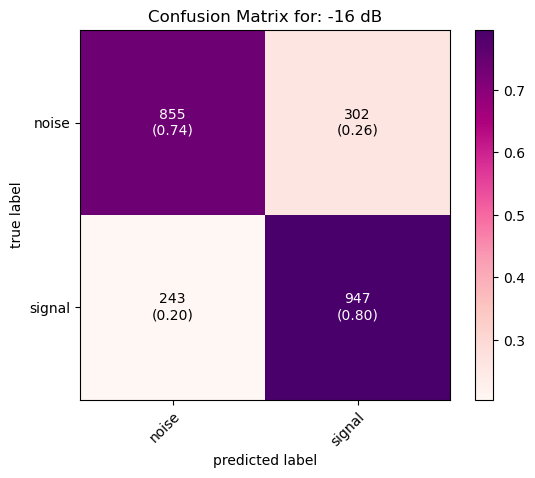

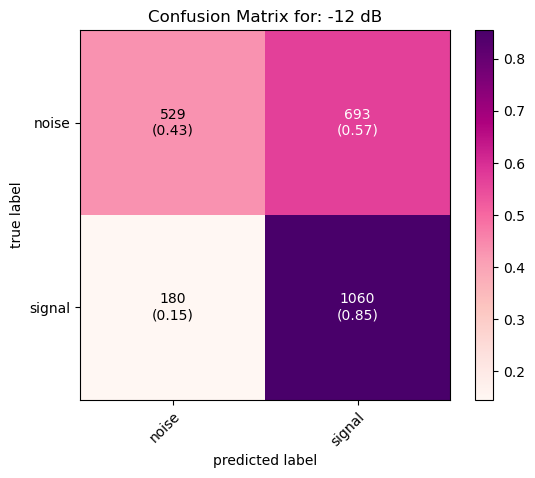

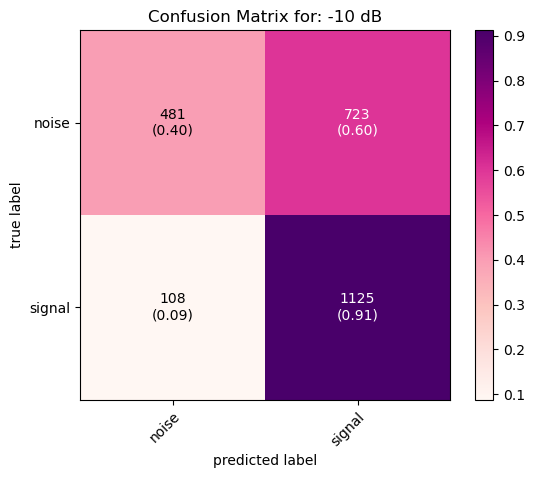

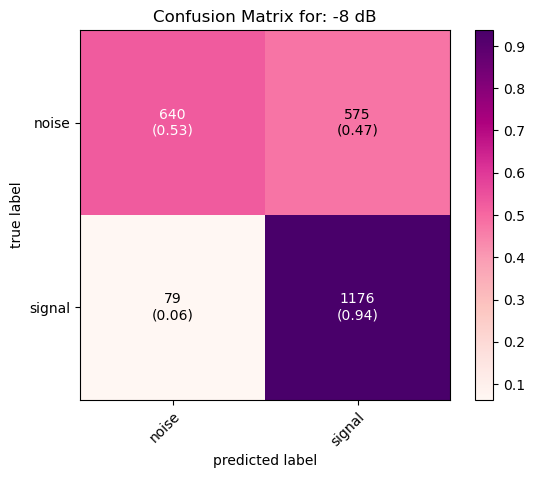

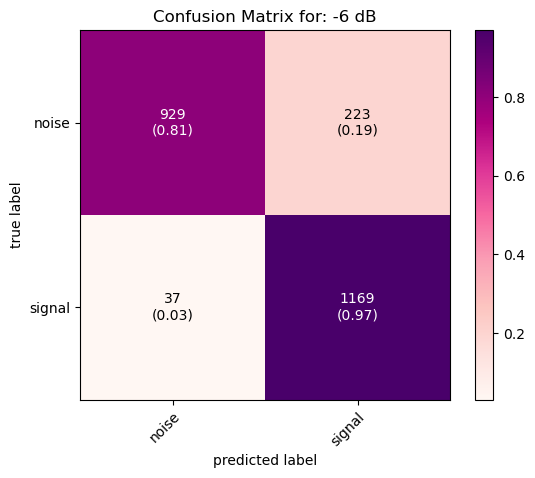

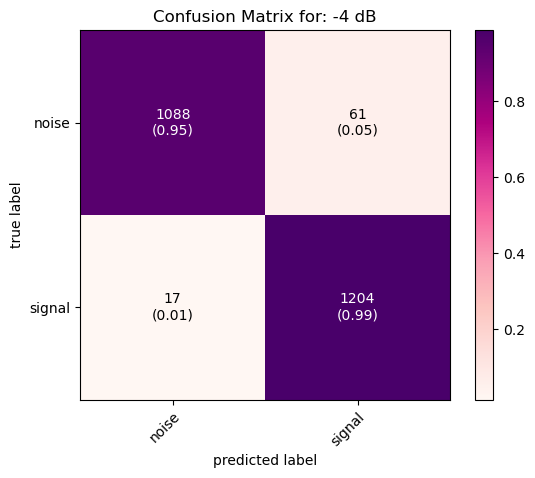

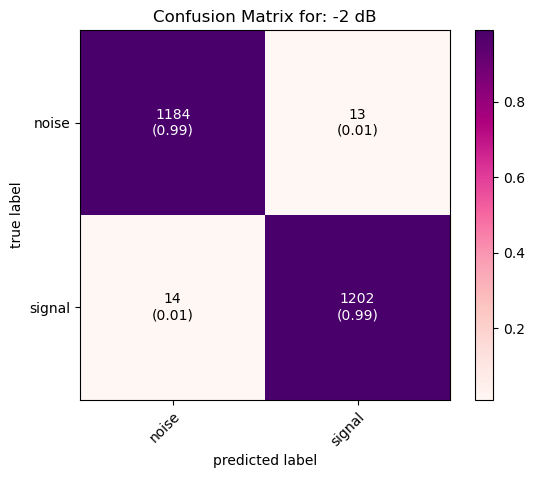

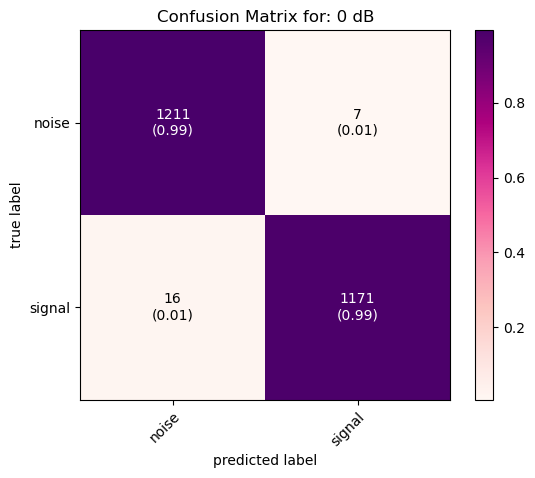

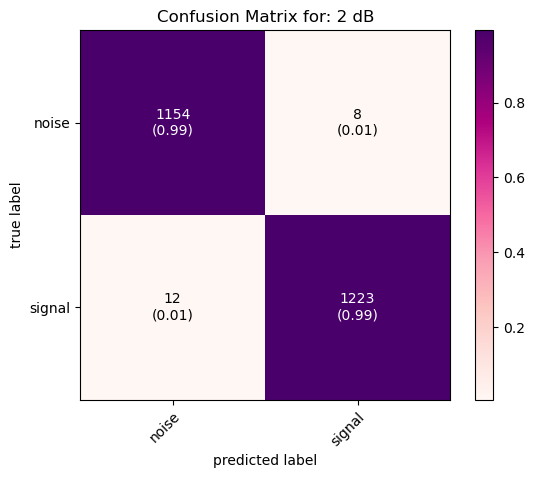

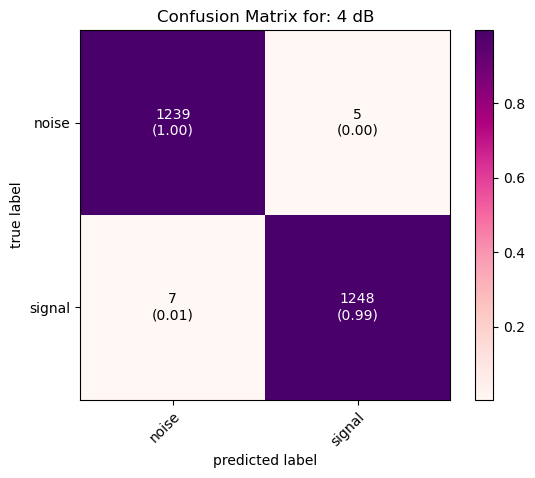

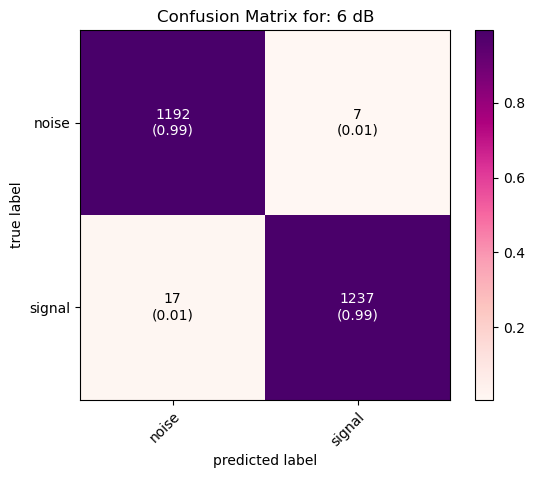

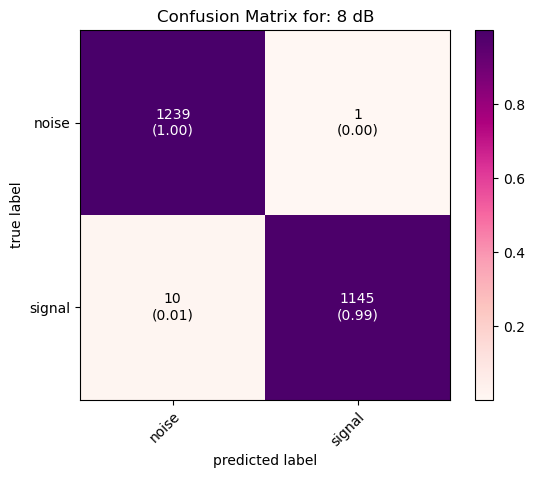

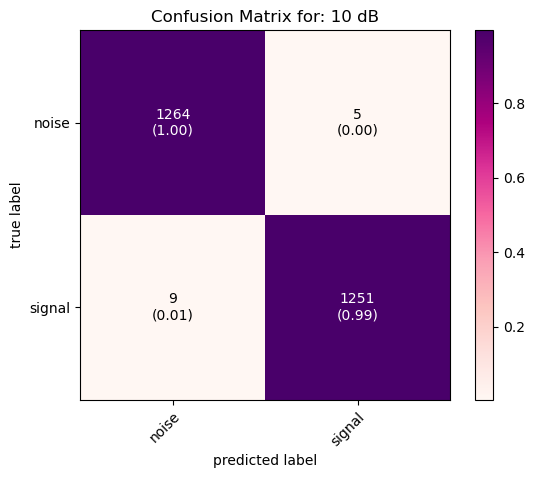

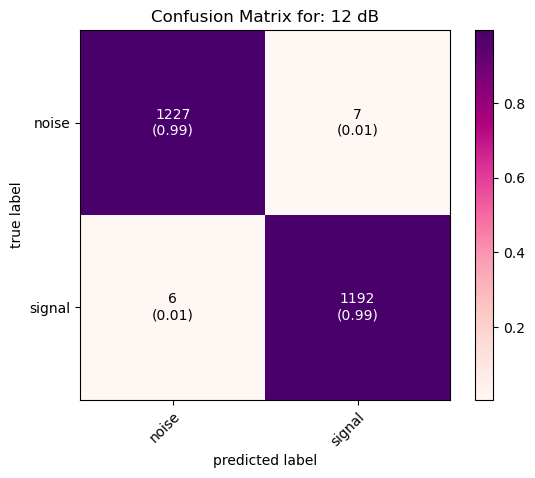

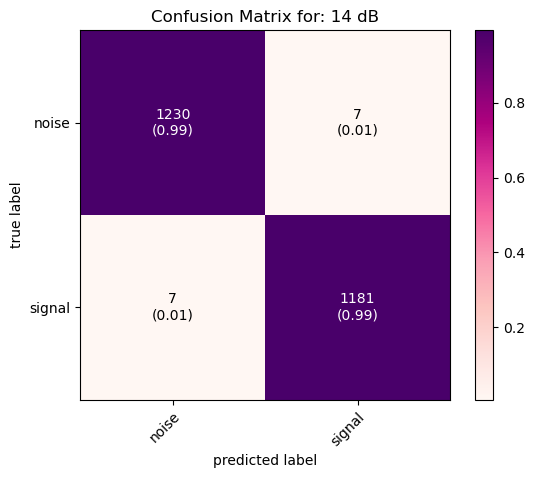

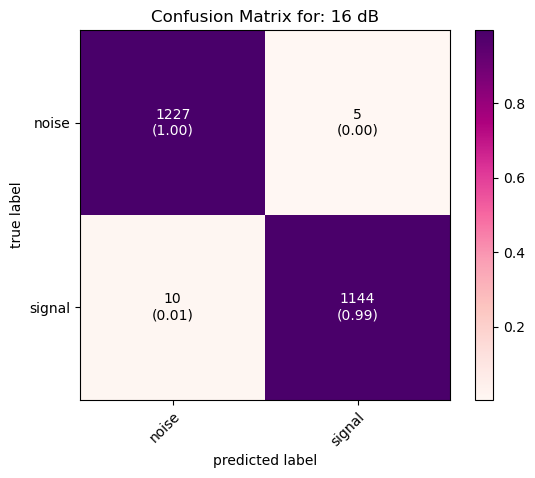

In [51]:
snr = [-20, -16, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16]
for i in range(len(snr)):
    pred_cm = []
    true_cm = []
    for k in range(len(data_snr)):
        if(data_snr['SNR'][k] == snr[i]):
           pred_cm.append(data_snr['prediction'][k])
           true_cm.append(data_snr['labels'][k])
    cm = confusion_matrix(true_cm, pred_cm)
    class_names = ['noise','signal']
    fig, ax = plot_confusion_matrix(conf_mat=cm, cmap = 'RdPu', class_names = class_names , colorbar=True , show_normed= True)
    plt.title(f"Confusion Matrix for: {snr[i]} dB")
    plt.show()

Confusion Matrix